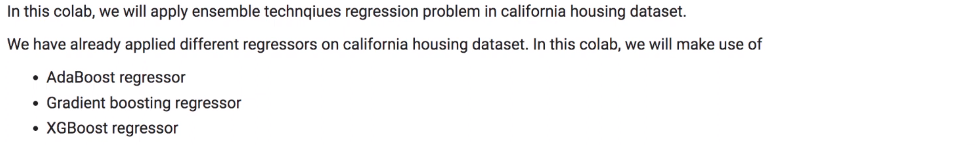

In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

In [2]:
np.random.seed(306)

In [3]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [4]:
# fetch dataset
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
labels *= 100

# train-test split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels, random_state=42
)

# train --> train + dev-split
train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42
)

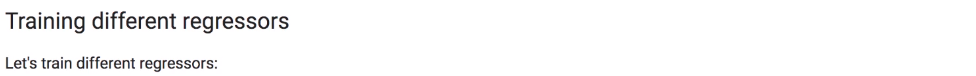

In [5]:
def train_regressor(estimator, X_train, y_train, cv, name):
    cv_results = cross_validate(
        estimator,
        X_train,
        y_train,
        cv=cv,
        scoring='neg_mean_absolute_error',
        return_train_score=True,
        return_estimator=True
    )
    
    cv_train_error = -1 * cv_results['train_score']
    cv_test_error = -1 * cv_results['test_score']    
    
    print(f'On an average, {name} makes an error of '
      f'{cv_train_error.mean():.3f}k +/- {cv_train_error.std():.3f}k on the training set.')
    print(f'On an average, {name} makes an error of '
      f'{cv_test_error.mean():.3f}k +/- {cv_test_error.std():.3f}k on the test set.')

In [6]:
#@title AdaBoost Regressor
train_regressor(
    AdaBoostRegressor(),
    com_train_features,
    com_train_labels,
    cv,
    '*AdaBoostRegressor*'
)

On an average, *AdaBoostRegressor* makes an error of 73.263k +/- 6.031k on the training set.
On an average, *AdaBoostRegressor* makes an error of 73.623k +/- 6.057k on the test set.


In [7]:
#@title GradientBoosting Regressor
train_regressor(
    GradientBoostingRegressor(),
    com_train_features,
    com_train_labels,
    cv,
    '*GradientBoostingRegressor*'
)

On an average, *GradientBoostingRegressor* makes an error of 35.394k +/- 0.273k on the training set.
On an average, *GradientBoostingRegressor* makes an error of 36.773k +/- 0.723k on the test set.



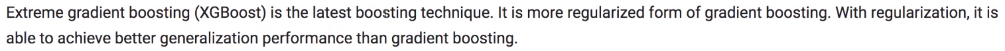

In [17]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(objective='reg:squarederror')

In [18]:
train_regressor(
    xgb_regressor,
    com_train_features,
    com_train_labels,
    cv,
    '*XGBoostRegressor*'
)

On an average, *XGBoostRegressor* makes an error of 18.308k +/- 0.182k on the training set.
On an average, *XGBoostRegressor* makes an error of 31.845k +/- 0.753k on the test set.
